## PERANCANGAN SIMULASI KENDALI VALVE DENGAN ALGORITMA LOGIKA FUZZY

####  Faisal Baja Esa Putra (09011281722043)

Salah satu aplikasi teknik instrumentasi kendali yang sering ditemukan di industri adalah control valve (katup). Hampir semua industri minyak  dan  gas  menggunakan control valve . Tetapi Control ini Memiliki kelemahan dimana valve harus di atur manual oleh pekerja yang dimana pekerja harus selalu mengatur dan mengecheck keadaan valve setiap saat yang memiliki resiko tinggi akan kesalahan, kecelakaan dan sebagainya. Algoritma Fuzzy dapat di terapkan dalam hal ini dan membuat pekerjaan para pekerja agar lebih safety dan yang pasti lebih efesien dalam penggunaan tenaga manusianya.
Metode ini memanfaatkan sensor sebagai input untuk pengaturan valve ini di mana 
sistem ini akan mengkalkulasikan suhu dan  level cairan yang berada dalam pipa dan membuat suatu keputusan yang paling optimal untuk mengatur valve tersebut.
Manusia atau pekerja suatu perusahaan di sini bekerja sebagai pengatur paramater dari sistem ini di mana suhu, level cairan dan valve akan di program sesuai dengan pengalaman dan pengetahuan mereka dan membuat sistem ini makin optimal dan dapat di pecayakan sepenuhnya dalam pemorsesan valve otomatis ini.

### Input

Suhu
- ** Dingin : ** 10 - 50 derajat celcius
- ** Normal : ** 30 - 70 derajat celcius
- ** Panas : ** 50 - 100 derajat celcius

Level Cairan
- ** Rendah : ** 10 - 50 %
- ** Sedang : ** 30 - 70 %
- ** Tinggi : ** 50 - 100 %

### Output 

Control Valve (terbuka)
- ** Kecil : ** 10 - 50 %
- ** sedang : ** 30 - 60 %
- ** besar : ** 50 - 90 % 

dan berikut pemogramannya

### Mengimport library untuk fuzzy

library yang digunakan antara lain adalah numpy,matplotlib.pyplot dan skfuzzy.
kita juga mengambil fungsi control dari library skfuzzy

In [22]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# Fuzzifikasi Suhu

Proses untuk mengubah variabel non numerik menjadi variabel non fuzzy (numerik) menjadi variabel fuzzy (linguistik)

Untuk suhu , fungsi keanggotaan dibagi menjadi 3 bagian :

Suhu
- ** Dingin : ** 10 - 50 derajat celcius
- ** Normal : ** 30 - 70 derajat celcius
- ** Panas : ** 50 - 100 derajat celcius



In [23]:
suhu = ctrl.Antecedent(np.arange(10,101,1), 'suhu')
suhu_x = np.arange(10,101,1) #suhu_x disini hanya di gunakan untuk ploting 


Dengan fungsi keanggotaan suhu udara

\begin{equation}
  suhu['dingin'] = \mu SuhuDingin(x)=\begin{cases}
    (50 - x)/(50 - 10) , & \text{$10 < x < 50$}.\\
    0, & \text{$x > 50$}.
  \end{cases}
  \\
    suhu ['normal'] = \mu SuhuNormal(x)=\begin{cases}
    0, & \text{$x \leq 30$ atau $x \geq 70$}.\\
    (x - 30)/(50 - 30) , & \text{$30 < x \leq 50$}.\\
    (70 - x)/(70 - 50) , & \text{$50 \leq x < 70$}.\\
  \end{cases}
  \\
    suhu['panas'] = \mu SuhuPanas(x)=\begin{cases}
    0, & \text{$x < 50$}.\\
    (x - 50)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$x\geq 100$}.
  \end{cases}
\end{equation}



In [24]:
suhu['dingin'] = fuzz.trimf(suhu.universe, [10, 10, 50])
suhu['normal'] = fuzz.trimf(suhu.universe, [30, 50, 70])
suhu['panas'] = fuzz.trimf(suhu.universe, [50, 100, 100])


### PLOTTING MEMBERSHIP FUNCTION SUHU

Plotting fungsi keanggotaan $\mu SuhuDingin(x)$

Text(0.5,1,'Suhu Dingin')

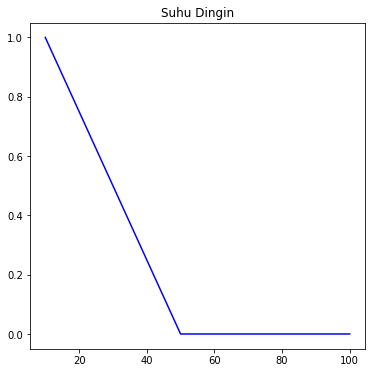

In [25]:
suhu_dingin = fuzz.trimf(suhu.universe, [10, 10, 50])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(suhu_x,suhu_dingin,'blue')
ax0.set_title('Suhu Dingin')

Plot fungsi keanggotaan $\mu SuhuNormal(x) $

Text(0.5,1,'Suhu normal')

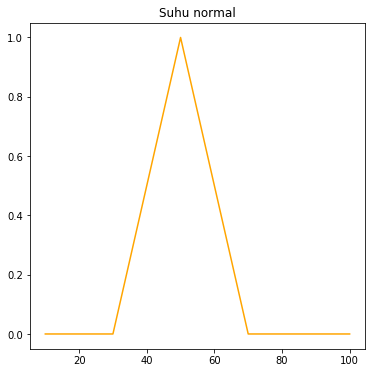

In [26]:
suhu_normal = fuzz.trimf(suhu.universe, [30, 50, 70])
fig3, (ax2) = plt.subplots(nrows=1,figsize=(6,6))
ax2.plot(suhu_x,suhu_normal,'orange')
ax2.set_title('Suhu normal')

Plot fungsi keanggotaan $\mu SuhuPanas(x) $

Text(0.5,1,'Suhu Panas')

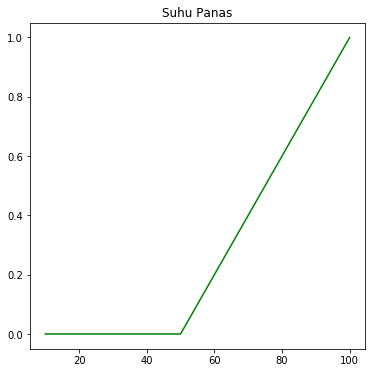

In [27]:
suhu_panas = fuzz.trimf(suhu.universe, [50, 100, 100])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(suhu_x,suhu_panas,'green')
ax0.set_title('Suhu Panas')

C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


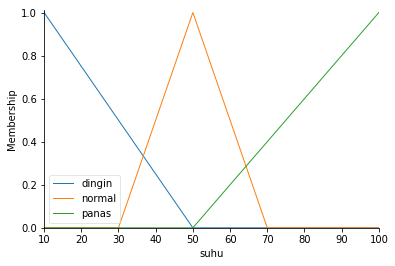

In [28]:
suhu.view()

# Fuzzifikasi Level ketinggian cairan

Level Cairan
- ** Rendah : ** 10 - 50 %
- ** Sedang : ** 30 - 70 %
- ** Tinggi : ** 50 - 100 %

In [29]:
level = ctrl.Antecedent(np.arange(10,101,1), 'level')
level_x = np.arange(10,101,1)


Dengan fungsi keanggotaan level ketinggian cairan


\begin{equation}
  level['rendah'] = \mu LevelRendah(x)=\begin{cases}
    (50 - x)/(50 - 10) , & \text{$10 < x < 50$}.\\
    0, & \text{$x > 50$}.
  \end{cases}
  \\
    level ['sedang'] = \mu LevelSedang(x)=\begin{cases}
    0, & \text{$x \leq 30$ atau $x \geq 70$}.\\
    (x - 30)/(50 - 30) , & \text{$30 < x \leq 50$}.\\
    (70 - x)/(70 - 50) , & \text{$50 \leq x < 70$}.\\
  \end{cases}
  \\
    Level['tinggi'] = \mu LevelTinggi(x)=\begin{cases}
    0, & \text{$x < 50$}.\\
    (x - 50)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$x\geq 100$}.
  \end{cases}
\end{equation}




In [30]:
level['rendah'] = fuzz.trimf(level.universe, [10, 10, 50])
level['sedang'] = fuzz.trimf(level.universe, [30, 50, 70])
level['tinggi'] = fuzz.trimf(level.universe, [50, 100, 100])

### PLOTTING MEMBERSHIP FUNCTION LEVEL KETINGGIAN CAIRAN

Plotting fungsi keanggotaan $\mu LevelRendah(x)$

Text(0.5,1,'Level Cairan Rendah')

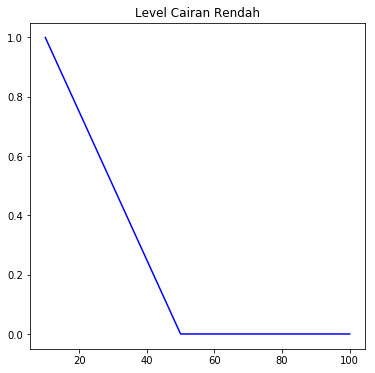

In [31]:
level_rendah = fuzz.trimf(level.universe, [10, 10, 50])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(level_x,level_rendah,'blue')
ax0.set_title('Level Cairan Rendah')

Plotting fungsi keanggotaan $\mu LevelSedang(x)$

Text(0.5,1,'Level Cairan Sedang')

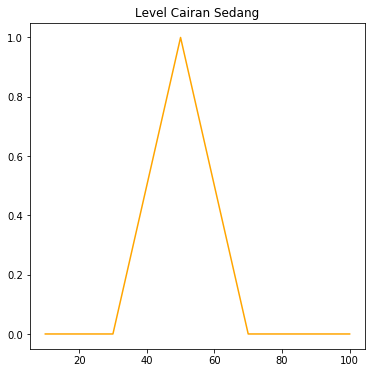

In [32]:
level_sedang = fuzz.trimf(level.universe, [30, 50, 70])
fig3, (ax2) = plt.subplots(nrows=1,figsize=(6,6))
ax2.plot(level_x,level_sedang,'orange')
ax2.set_title('Level Cairan Sedang')

Plotting fungsi keanggotaan $\mu LevelTinggi(x)$

Text(0.5,1,'Level Cairan Tinggi')

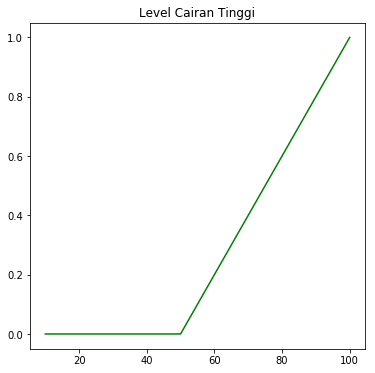

In [33]:
level_tinggi = fuzz.trimf(level.universe, [50, 100, 100])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(level_x,level_tinggi,'green')
ax0.set_title('Level Cairan Tinggi')

C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


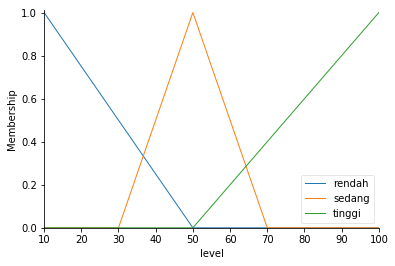

In [34]:
level.view()

# Fuzzifikasi Derajat Terbukanya Valve

Untuk Control valve terbagi menjadi tiga bagian yaitu :
Control Valve (terbuka)
- ** Kecil  : ** 10 - 50 %
- ** sedang : ** 40 - 60 %
- ** besar : ** 50 - 90 % 


In [35]:
valve = ctrl.Consequent(np.arange(10,91,1),'valve')
valve_x = np.arange(10,91,1)

Dengan fungsi keanggotaan Control Derajat terbukanya valve


\begin{equation}
  valve['kecil'] = \mu ValveKecil(x)=\begin{cases}
    (50 - x)/(50 - 10) , & \text{$1 < x < 50$}.\\
    0, & \text{$x > 50$}.
  \end{cases}
  \\
    valve ['sedang'] = \mu ValveSedang(x)=\begin{cases}
    0, & \text{$x \leq 40$ atau $x \geq 60$}.\\
    (x - 40)/(50 - 40) , & \text{$40 < x \leq 50$}.\\
    (60 - x)/(60 - 50) , & \text{$50 \leq x < 60$}.\\
  \end{cases}
  \\
    valve['besar'] = \mu ValveBesar(x)=\begin{cases}
    0, & \text{$x < 50$}.\\
    (x - 50)/(90 - 50) , & \text{$50 < x < 90$}.\\
    1, & \text{$x\geq 90$}.
  \end{cases}
\end{equation}


In [36]:
valve['kecil'] = fuzz.trimf(valve.universe, [10, 10, 50])
valve['sedang'] = fuzz.trimf(valve.universe, [40, 50, 60])
valve['besar'] = fuzz.trimf(valve.universe, [50, 90, 90])

### PLOTTING MEMBERSHIP DERAJAT TERBUKANYA VALVE

Plotting fungsi keanggotaan $\mu ValveKecil(x)$

Text(0.5,1,'Derajat Valve Kecil')

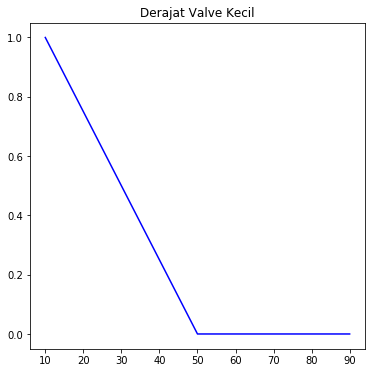

In [37]:
valve_kecil = fuzz.trimf(valve.universe, [10, 10, 50])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(valve_x,valve_kecil,'blue')
ax0.set_title('Derajat Valve Kecil')

Plotting fungsi keanggotaan $\mu ValveSedang(x)$

Text(0.5,1,'Derajat Valve Sedang')

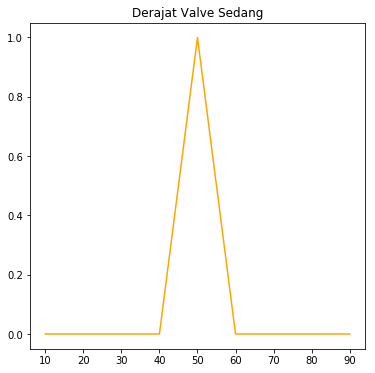

In [38]:
valve_sedang = fuzz.trimf(valve.universe, [40, 50, 60])
fig3, (ax2) = plt.subplots(nrows=1,figsize=(6,6))
ax2.plot(valve_x,valve_sedang,'orange')
ax2.set_title('Derajat Valve Sedang')

Plotting fungsi keanggotaan $\mu ValveBesar(x)$

Text(0.5,1,'Derajat Valve Besar')

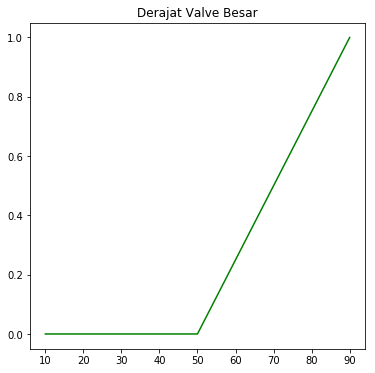

In [39]:
valve_besar = fuzz.trimf(valve.universe, [50, 90, 90])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(valve_x,valve_besar,'green')
ax0.set_title('Derajat Valve Besar')

C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


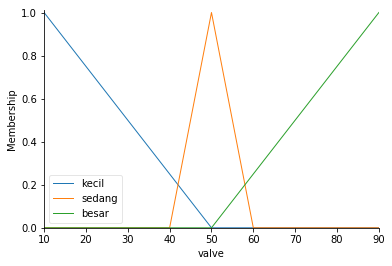

In [40]:
valve.view()

# Inferencing
Pada tahap inferencing, membuat aturan-aturan fuzzy yang dinyatakan dalam bentuk IF .... THEN ....

Rule-1 : IF Suhu Dingin Dan Level  Tinggi THEN Valve buka Kecil  
Rule-2 : IF Suhu Dingin Dan Level  Rendah THEN Valve buka Sedang  
Rule-3 : IF Suhu Dingin Dan Level  Sedang THEN Valve buka Kecil  
Rule-4 : IF Suhu Normal Dan Level  Tinggi THEN Valve buka Kecil  
Rule-5 : IF Suhu Normal Dan Level  Rendah THEN Valve buka Sedang  
Rule-6 : IF Suhu Normal Dan Level  Sedang THEN Valve buka Sedang  
Rule-7 : IF Suhu Panas  Dan Level  Tinggi THEN Valve buka Kecil  
Rule-8 : IF Suhu Panas  Dan Level  Rendah THEN Valve buka Besar  
Rule-9 : IF Suhu Panas  Dan Level  Sedang THEN Valve buka Sedang  

In [41]:
rule1 = ctrl.Rule(suhu['dingin'] & level['tinggi'],valve['kecil'])
rule2 = ctrl.Rule(suhu['dingin'] & level['rendah'],valve['sedang'])
rule3 = ctrl.Rule(suhu['dingin'] & level['sedang'],valve['kecil'])

rule4 = ctrl.Rule(suhu['normal'] & level['tinggi'],valve['kecil'])
rule5 = ctrl.Rule(suhu['normal'] & level['rendah'],valve['sedang'])
rule6 = ctrl.Rule(suhu['normal'] & level['sedang'],valve['sedang'])

rule7 = ctrl.Rule(suhu['panas'] & level['tinggi'],valve['kecil'])
rule8 = ctrl.Rule(suhu['panas'] & level['rendah'],valve['besar'])
rule9 = ctrl.Rule(suhu['panas'] & level['sedang'],valve['sedang'])

# RULE EVALUATION

In [42]:
valve_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4, rule5, rule6,rule7, rule8, rule9])

# DEFUZZIFIKASI

In [43]:
terbuka = ctrl.ControlSystemSimulation(valve_ctrl)

penginputan data dimana input suhu adalah 40 derajat dan level cairan 60%

In [44]:
terbuka.input['suhu'] = 40
terbuka.input['level'] = 60

Melakukan perhitungan defuzzifikasi

In [45]:
terbuka.compute()

Mencetak hasil output defuzzifikasi

In [46]:
print (terbuka.output['valve'])

37.551912568306015


Plotting fungsi keanggotaan suhu setelah ketika di input kedalam sistem simulasi

C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


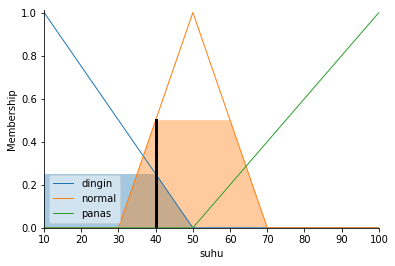

In [47]:
suhu.view(sim=terbuka)

Plotting fungsi keanggotaan level cairan setelah ketika di input kedalam sistem simulasi

C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


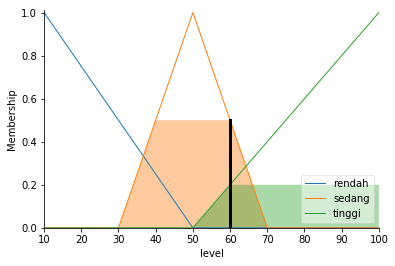

In [48]:
level.view(sim=terbuka)

Plotting fungsi keanggotaan Derajat terbukanya Valve setelah dilakukan perhitungan defuzzifikasi 

C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


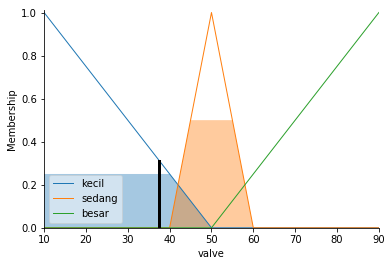

In [50]:
valve.view(sim=terbuka)

# Perhitungan Manual

Berapa Persen katup Pipa yang tersambung pada Sebuah penampung minyak dalam keadaan terisi 70% bagiannya dan memiliki suhu 40 derajat ?




### Input Nilai Suhu kedalam fungsi keanggotan Suhu 
### Suhu = 40

Rentan
Suhu
- ** Dingin : ** 10 - 50 derajat celcius
- ** Normal : ** 30 - 70 derajat celcius
- ** Panas : ** 50 - 100 derajat celcius


Dengan fungsi keanggotaan suhu

\begin{equation}
  suhu['dingin'] = \mu SuhuDingin(x)=\begin{cases}
    (50 - x)/(50 - 10) , & \text{$10 < x < 50$}.\checkmark\\
    0, & \text{$x > 50$}.
  \end{cases}
  \\
    suhu ['normal'] = \mu SuhuNormal(x)=\begin{cases}
    0, & \text{$x \leq 30$ atau $x \geq 70$}.\\
    (x - 30)/(50 - 30) , & \text{$30 < x \leq 50$}.\checkmark\\
    (70 - x)/(70 - 50) , & \text{$50 \leq x < 70$}.\\
  \end{cases}
  \\
    suhu['panas'] = \mu SuhuPanas(x)=\begin{cases}
    0, & \text{$x < 50$}.\\
    (x - 50)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$x\geq 100$}.
  \end{cases}
\end{equation}


### Mode Inferensi 

#### Himpunan Suhu Dingin
$\mu SuhuDingin(x)$ (40) = (50 - 40)/(50 - 10)   
$\mu SuhuDingin(x)$ (40) = 0.25

#### Himpunan Suhu Normal
$\mu SuhuNormal(x)$ (40) = (40 - 30)/(50 - 30)     
$\mu SuhuNormal(x)$ (40) = 0.5



### Input Nilai Level Cairan kedalam fungsi keanggotan Level 
### level = 60

Rentan Level Cairan
Level Cairan

- ** Rendah : ** 10 - 50 %
- ** Sedang : ** 30 - 70 %
- ** Tinggi : ** 50 - 100 %

Dengan Fungsi Keanggotan Level Cairan
\begin{equation}
  level['rendah'] = \mu LevelRendah(x)=\begin{cases}
    (50 - x)/(50 - 10) , & \text{$10 < x < 50$}.\\
    0, & \text{$x > 50$}.
  \end{cases}
  \\
    level ['sedang'] = \mu LevelSedang(x)=\begin{cases}
    0, & \text{$x \leq 30$ atau $x \geq 70$}.\\
    (x - 30)/(50 - 30) , & \text{$30 < x \leq 50$}.\\
    (70 - x)/(70 - 50) , & \text{$50 \leq x < 70$}.\checkmark\\
  \end{cases}
  \\
    Level['tinggi'] = \mu LevelTinggi(x)=\begin{cases}
    0, & \text{$x < 50$}.\\
    (x - 50)/(100 - 50) , & \text{$50 < x < 100$}.\checkmark\\
    1, & \text{$x\geq 100$}.
  \end{cases}
\end{equation}

Himpunan Level Sedang        
$\mu LevelSedang(x)$ (60) = (70 - 60)/(70 - 50)   
$\mu LevelSedang(x)$ (60) = 0.5

Himpunan Level Tinggi      
$\mu LevelTinggi(x)$ (60) = (60 - 50)/(100 - 50)     
$\mu LevelTinggi(x)$ (60) = 0.2


# Rule Evaluation

1. Suhu Dingin (0.25) & Level Sedang (0.5) = (min) Valve Kecil (0.25)
2. Suhu Dingin (0.25) & Level Tinggi (0.2) = (min) Valve Kecil (0.2)
3. Suhu Normal (0.5) & Level Sedang (0.5) = (min) Valve Sedang (0.5)
4. Suhu Normal (0.5) & Level Tinggi (0.2) = (min) Valve Kecil (0.2)

# Agregasi Dan Defuzzifikasi

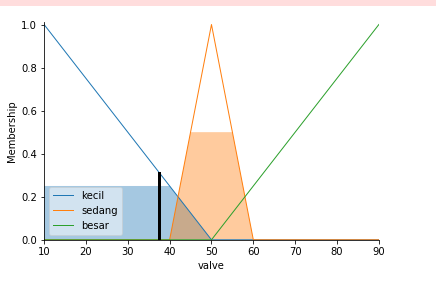
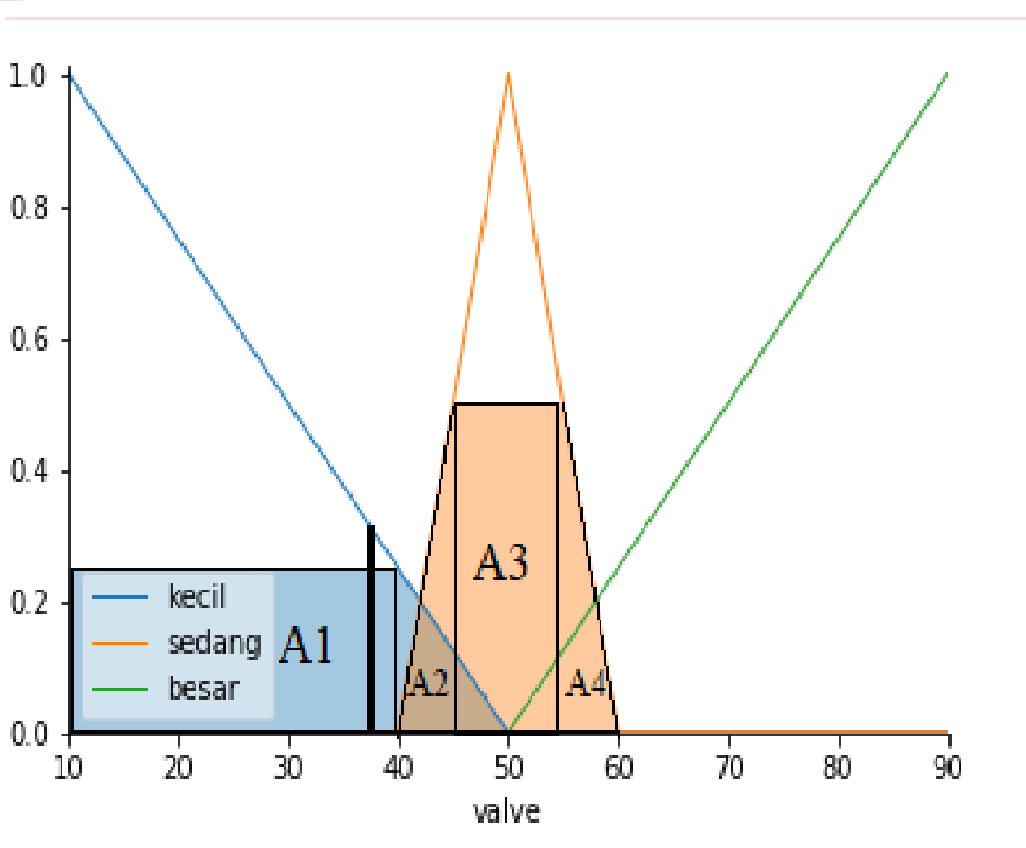

 ## $$Hasil = \frac { \sum A_1 X_1}
  {\sum A_1}$$

Untuk mencari nilai A kita dapat menggunakan beberapa rumus 
jika A berbentuk Persegi Panjang maka rumus yang di gunakan adalah
$$ A = P \times L $$
Dan jika Nilai A berbentuk Segitiga maka rumus yang di gunakan adalah
$$ A = \frac  {1} {2}   (P \times L) $$ 

Rentang Nilai A 
$$ A1 = 10 - 40 $$
$$ A2 = 40 - 45 $$
$$ A3 = 45 - 55 $$
$$ A4 = 55 - 60 $$

Mencari Nilai A1   
 $ A1 = P \times L $  
 $ A1 = 30 \times 0.25 $  
 $ A1 = 7.5‬ $  
 
 Mencari Nilai A2   
 $ A2 = \frac  {1} {2}   (P \times L) $    
 $ A2 = \frac  {1} {2}   (5 \times 0.5) $   
 $ A2 = 1.25 ‬ $  
 
 Mencari Nilai A3   
 $ A3 = P \times L $  
 $ A3 = 5\ \times 0.5 $  
 $ A3 = 2.5 ‬ $  
 
  Mencari Nilai A4   
 $ A4 = \frac  {1} {2}   (P \times L) $    
 $ A4 = \frac  {1} {2}   (5 \times 0.5) $   
 $ A4 = 1.25 ‬ $  

untuk mencari Nilai X nya Kita akan menunggunakan rumus beberapa rumus,
jika daerah x yang ingin kita cari nilai nya berbentuk segitiga makan rumus yang di gunakan adalah :
- $ X = a + \frac  {2} {3}   (b - a) $ untuk segitiga yang memiliki tinggi di bagian kanan (gambar area A)
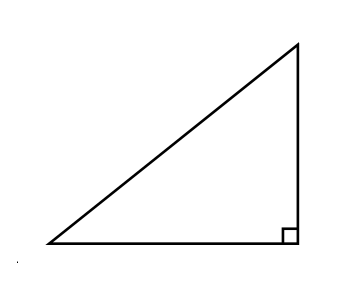
dan
- $ X = a + \frac  {1} {3}   (b - a) $ untuk segitiga yang memiliki tinggi di bagian kiri (gambar area A)  
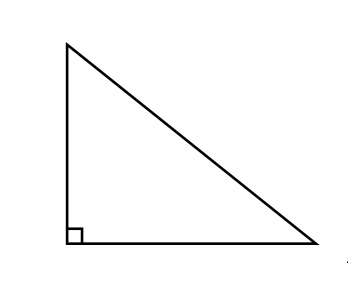

jika daerah x yang ingin kita cari nilai nya berbentuk Persegi Panjang makan rumus yang di gunakankan adalah   
- $ X = \frac  {1} {2}   (b + a) $

#### catatan
- a adalah batas bawah dari suatu area 
- b adalah batas atas dari suatu area

mencari nilai X1  
$ X1 = \frac  {1} {2}   (b + a) $   
$ X1 = \frac  {1} {2}   (40 + 10) $  
$ X1 = \frac  {50} {2}  $  
$ X1 = 25 $  

mencari nilai X2  
$ X2 = a + \frac  {2} {3}   (b - a) $  
$ X2 = 40 + \frac  {2} {3}   (45 - 40) $  
$ X2 = 40 + \frac  {5} {3}  $    
$ X2 = 40 + 1.667‬  $   
$ X2 = 41.667‬  $  

mencari nilai X3  
$ X3 = \frac  {1} {2}   (b + a) $   
$ X3 = \frac  {1} {2}   (55 + 45) $  
$ X3 = \frac  {100} {2}  $  
$ X3 = 50 $  

mencari nilai X4   
$ X4 = a + \frac  {1} {3}   (b - a) $   
$ X4 = 55 + \frac  {1} {3}   (60 - 55) $   
$ X4 = 55 + \frac  {5} {3}  $
$ X4 = 55 + 1.667‬ $   
$ X4 = 56.667‬  $

  $$Hasil = \frac { \sum A_1 X_1}
  {\sum A_1}$$  
  
$$Hasil = \frac { A_1 \times X_1 + A_2 \times X_2 + A_3 \times X_3 + A_4 \times X_4 } {A_1 + A_2 + A_3 + A_4} $$  

$$Hasil = \frac { 7.5 \times 25 + 1.375 \times 41.667 + 5.75 \times 50 + 1.375 \times 56.667 } {7.5 + 1.375 + 5.75 + 1.375} $$   

$$Hasil = \frac { 187.5 + 52,084 + 287.5 +70.834  } {15.75‬‬} $$ 

$$Hasil = \frac {597.918‬} {15.75} $$ 

$$Hasil =   37.96304761904762‬ $$ 



# Analisa 

Hasil Output yang didapatkan adalah 37,96304761904762‬ % dengan menggunakan perhitungan manual sedangkan untuk Output dari program phyton adalah 37.551912568306015 % terdapat perbedaan angka sebesar 0.41113505074147‬

selisih tersebut terjadi di sebabkan oleh pengambilan angka yang hanya sampai 3 angka saja dan juga beberapa kesalahan matematis saat menghitung manualnya. Berbeda dengan program phyton yang menggunakan semua output angka yang ada  